In [1]:
from operator import index

from utils import GraphEdgeIterator, GraphCycleIterator, iteration_logging
from tqdm.notebook import tqdm
import io
import pandas as pd


In [2]:
OMEGA = 10
BUFFER_COUNT = 2
PRUNE_INTERVAL = 1_000

_TOTAL_EDGES = 2_912_276

In [3]:
csv_stream = io.StringIO()

wrapped_edges = GraphCycleIterator(
    tqdm(  # type: ignore
        iteration_logging(
            GraphEdgeIterator(buffer_count=BUFFER_COUNT),
            log_stream=csv_stream,
        ),
        total=_TOTAL_EDGES,
        desc="Edges",
    ),
    omega=OMEGA,
    prune_interval=PRUNE_INTERVAL
)

Edges:   0%|          | 0/2912276 [00:00<?, ?it/s]

In [6]:
wrapped_edges.run()

array([<Axes: xlabel='time_seconds'>, <Axes: xlabel='time_seconds'>,
       <Axes: xlabel='time_seconds'>], dtype=object)

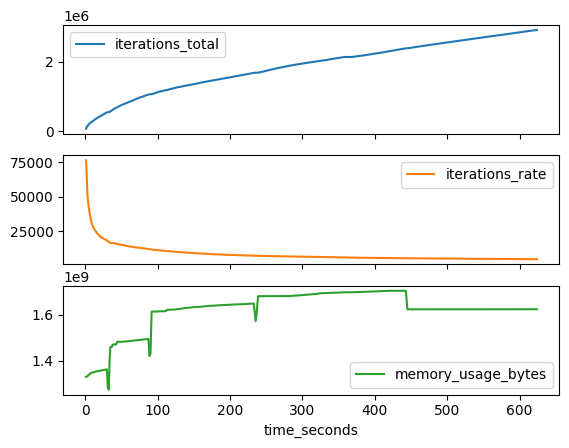

In [7]:
csv_stream.seek(0)
df = pd.read_csv(csv_stream)
df = df.set_index("time_seconds")
df.plot(subplots=True)


In [16]:
len(wrapped_edges._reverse_reachability)

655603

In [15]:
from sortedcontainers import SortedList

# Define a custom key function for sorting
def root_sort_key(edge):
    v, start, end, _ = edge
    return v, start, -end

# Initialize the sorted list with the custom key
edges = SortedList(key=root_sort_key)